# 1.Titanic

# ML Internship Task1
SaimaBatool


1 . Data Exploration:
Check for missing data and outliers.
2. Data Preprocessing:
suitable format for machine learning.
3. Model Building:
decision trees, random forests, or others.
- Begin by exploring the dataset to understand its structure and features.
- Preprocess the data by handling missing values and converting categorical variables into a
-Choose and implement machine learning algorithms for classification, such as logistic regression,
decision trees, random forests, or others.
4. Model Evaluation:
-Evaluate the performance of your model using appropriate metrics like accuracy, precision,
recall, and F1-score.
5. Model Tuning:
- Experiment with hyperparameter tuning to improve model performance.
6. Documentation:
- Create a report documenting your approach, findings, and the rationale behind your model choices.

Content of this notebook:
Data Importing
Data Preprocessing
Missing value analysis
Data Visualization
Deducing From Graphs
Future Analysis
Creating Models
Comparing the Models
Model Analysis

In [1]:
import pandas as pd

In [2]:
#Importing libraries for EDA and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

Content of this notebook:¶
Data Importing
Data Preprocessing
Missing value analysis
Data Visualization
Deducing From Graphs
Future Analysis
Creating Models
Comparing the Models
Model Analysis

In [3]:
# Data Importing
train_df = pd.read_csv('C:/Users/Dell/Downloads/Ml_Project_intern/task_1_TItanic/train.csv')
test_df = pd.read_csv('C:/Users/Dell/Downloads/Ml_Project_intern/task_1_TItanic/test.csv')
test_survived = pd.read_csv('C:/Users/Dell/Downloads/Ml_Project_intern/task_1_TItanic/gender_submission.csv')

In [4]:
print("Shape of train_df :",train_df.shape)
print("Shape of test_df :",test_df.shape)
print("Shape of test_survived :",test_survived.shape)


Shape of train_df : (891, 12)
Shape of test_df : (418, 11)
Shape of test_survived : (418, 2)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train_df["train/test"] = "Train"
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [10]:
# Adding "Survived" column to test dataset.
test_df = test_df.merge(test_survived)
test_df.insert(1,"survived",value=test_df["Survived"])
test_df.drop(columns="Survived",inplace=True)
test_df.rename(columns={"survived":"Survived"}, inplace=True)

#  I will add a new column which called train/test in order not to confuse the train and test datasets. I will split them later.
test_df["train/test"] = "Test"
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [11]:
# Creating general dataframe that includes train and test datasets.
df = pd.concat([train_df,test_df])
print("Shape of df :",df.shape)
df.head()


Shape of df : (1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train/test   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


In [13]:
# I want to take Passenger ID as an index.
df.set_index("PassengerId", inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [14]:
# Statistical informations about dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# 1. Data Exploration:
Check for Missing Data:
Check for missing values in each column of your dataset.

In [15]:
# Rate of missing values by columns.
df.isna().sum() / df.shape[0] * 100

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           20.091673
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.076394
Cabin         77.463713
Embarked       0.152788
train/test     0.000000
dtype: float64

Inference 2:
We need to drop "Cabin" column cause there is %77 missing values.

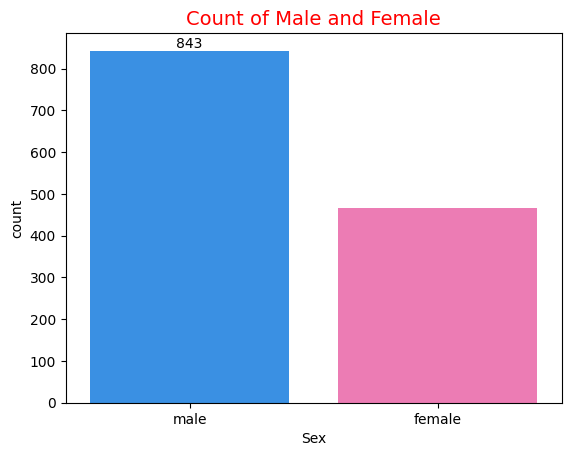

In [16]:
ax = sns.countplot(data=df, x="Sex", palette=sns.color_palette(["#1e90ff","#ff69b4"]))
ax.bar_label(ax.containers[0])
plt.title("Count of Male and Female", size=14, color="red");

Inference 3:
It's too obvious that count of male is more than female.

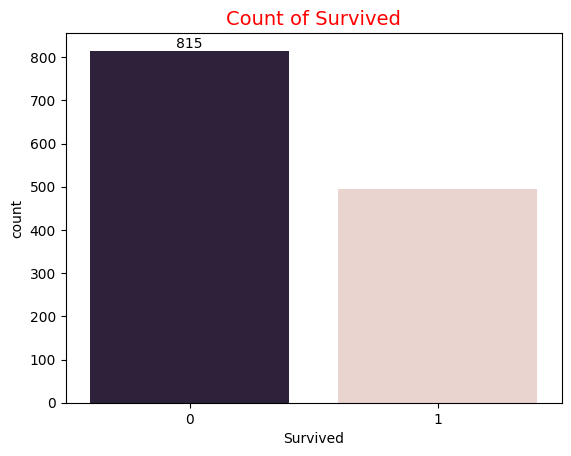

In [17]:
ax = sns.countplot(data=df, x="Survived", palette=sns.cubehelix_palette(2,reverse=True))
ax.bar_label(ax.containers[0])
plt.title("Count of Survived", size=14, color="red");

Inference 4:
Unfortunately passengers who survived are less.

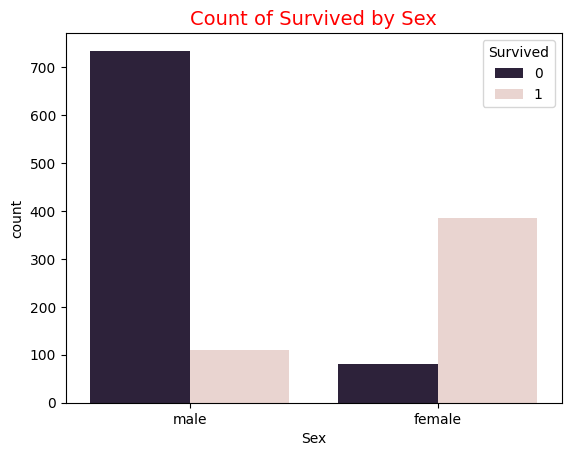

In [18]:
ax = sns.countplot(data=df, x="Sex", hue="Survived",palette=sns.cubehelix_palette(2,reverse=True))
plt.title("Count of Survived by Sex", size=14, color="red");

Inference 5:
Survived feamles are more than survived males.
We can say that males and females are reverse opposite of each others in terms of survival. Survived female passengers are more than deceased feamle passengers. On the other hand survived feamle passengers are less than deceased male passengers.


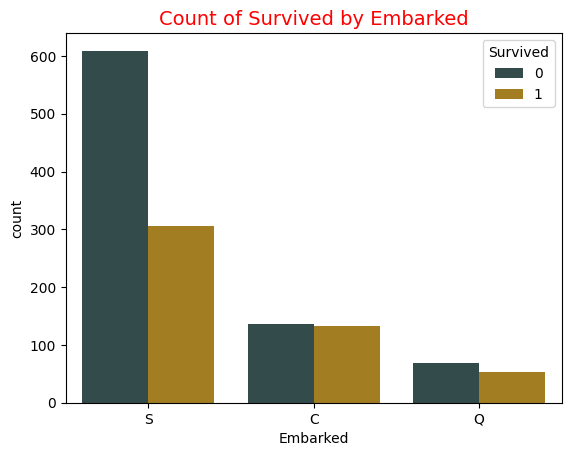

In [19]:
ax = sns.countplot(data=df, x="Embarked", hue="Survived",palette=sns.color_palette(["#2f4f4f","#b8860b"]))
plt.title("Count of Survived by Embarked", size=14, color="red");

Inference 6:
In Cherbourg and Queenstown the count of survived is vastly balanced.
In Southampton the dead passengers almost twice as many survivors.

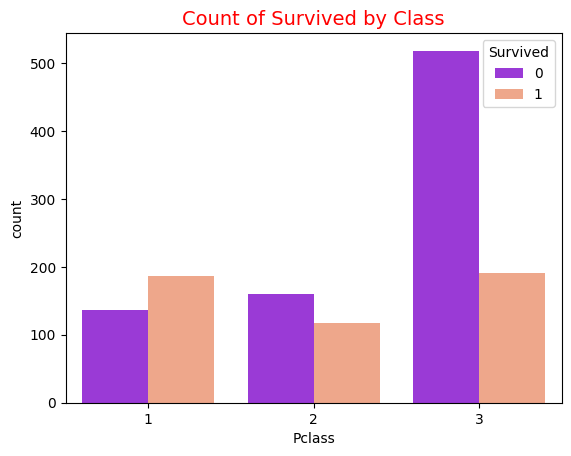

In [20]:
ax = sns.countplot(data=df, x="Pclass", hue="Survived",palette=sns.color_palette(["#a020f0","#ffa07a"]))
plt.title("Count of Survived by Class", size=14, color="red");

Inference 7:
Most of the deceased passengers are from class 3.
In class 1 and 2 the rate of survival is vastly balanced.

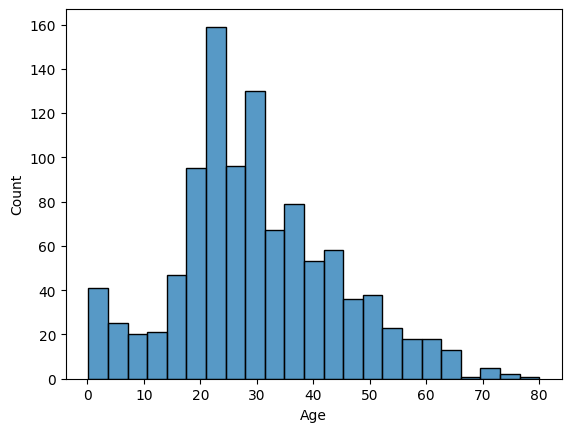

In [21]:
sns.histplot(x=df.Age);

Inference 8:
Most of the passengers are between 15-45 years old.
Scaling the "Fare" column

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Fare"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1))

In [23]:
df_melt = pd.melt(df[["Survived","Fare"]],id_vars="Survived",var_name="features",value_name="values")

<Axes: xlabel='features', ylabel='values'>

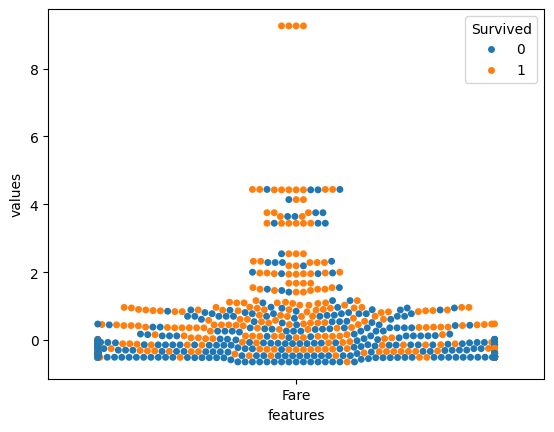

In [24]:
sns.swarmplot(data=df_melt, x="features",y="values",hue="Survived")

Inference 9:
The data points are homogeneously distributed. It might not be easy for program to distinguish.
Converting the categorical features to numeric

In [25]:
df["Sex"] = [1 if each == "male" else 0 for each in df.Sex]
df.replace({"C":0, "Q":1,"S":2}, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,-0.503402,NaN,2.0,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.734222,C85,0.0,Train
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,-0.490356,NaN,2.0,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.382778,C123,2.0,Train
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,-0.487940,NaN,2.0,Train


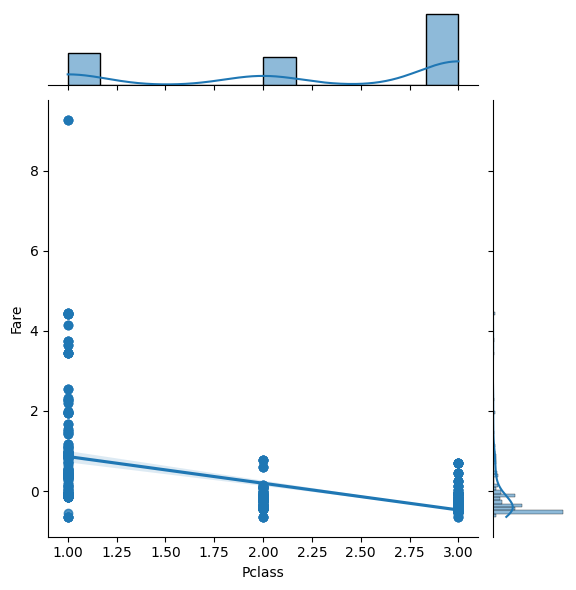

In [26]:
sns.jointplot(data=df, x="Pclass", y="Fare", kind="reg");

Inference 10:
As the passenger class number increases, the fare is decreasing so these two features are inversely proportional.

In [27]:
#plt.figure(figsize=(8,6))
#sns.heatmap(df.corr(), annot=True, fmt=".3f");

Future Selection
We see that "Age" and "SibSp" features have no serious correlation to "Survived" column wich is our target column. Furthermore in "Age" column there are many missing values. I think filling this values would be inaccurate because we don't know the real values. Hence i am not going to use this columns in our model.
I think there is no point to use both columns "Fare" and "Pclass" according to inference 10. But wich one should i take?
According to inference 8 the data points are homogeneously distributed and it can confuse the program so i will drop the "Fare" column.
We have some columns that don't affect o our model like "Name", "Ticket", "Cabin". I will also drop them too.

In [28]:
# Dropping the columns we have talked about above.
df.drop(columns=["Name","SibSp","Ticket","Age","Fare","Cabin"],inplace=True)

In [29]:
# Missing values analysis
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Parch         0
Embarked      2
train/test    0
dtype: int64

In [30]:
# Dropping the rows including NaN values.
df.dropna(subset=["Embarked"], inplace=True)

In [31]:
df.head()

,Survived,Pclass,Sex,Parch,Embarked,train/test
PassengerId,,,,,,
1,0,3,1,0,2.0,Train
2,1,1,0,0,0.0,Train
3,1,3,0,0,2.0,Train
4,1,1,0,0,2.0,Train
5,0,3,1,0,2.0,Train


In [32]:
correlation_matrix = df.corr(numeric_only=True)

In [33]:
categorical_features = ["Pclass","Sex","Parch","Embarked"]
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

In [34]:
df.head()

,Survived,train/test,Pclass_2,Pclass_3,Sex_1,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_1.0,Embarked_2.0
PassengerId,,,,,,,,,,,,,,
1,0,Train,False,True,True,False,False,False,False,False,False,False,False,True
2,1,Train,False,False,False,False,False,False,False,False,False,False,False,False
3,1,Train,False,True,False,False,False,False,False,False,False,False,False,True
4,1,Train,False,False,False,False,False,False,False,False,False,False,False,True
5,0,Train,False,True,True,False,False,False,False,False,False,False,False,True


# Train Test Split

In [35]:
df_train = df[df["train/test"] == "Train"]
df_test = df[df["train/test"] == "Test"]

In [36]:
df.columns

Index(['Survived', 'train/test', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Parch_9',
       'Embarked_1.0', 'Embarked_2.0'],
      dtype='object')

In [37]:
# Determine the x and y
x = df.drop(columns=["Survived","train/test"])
y = df["Survived"]


In [38]:
# Determine the train_x, train_y, test_x, test_y

train_x = df_train.drop(columns=["Survived","train/test"])
train_y = df_train["Survived"]

test_x = df_test.drop(columns=["Survived","train/test"])
test_y = df_test["Survived"]

print("train_x shape :",train_x.shape)
print("train_y shape :",train_y.shape)
print("test_X shape :",test_x.shape)
print("test_y shape :",test_y.shape)

train_x shape : (889, 12)
train_y shape : (889,)
test_X shape : (418, 12)
test_y shape : (418,)


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg0 = LogisticRegression()
grid= {"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV(logreg0,grid,cv=10)
logreg_cv.fit(x,y)
print("Best parameters of Logistic Regression :",logreg_cv.best_params_)

Best parameters of Logistic Regression : {'C': 100.0, 'penalty': 'l2'}


In [40]:
logreg = LogisticRegression(C=logreg_cv.best_params_["C"] , penalty=logreg_cv.best_params_["penalty"])
logreg.fit(train_x,train_y) 
print("Logistic Regression Accuracy :",logreg.score(test_x,test_y))

Logistic Regression Accuracy : 0.9832535885167464


KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn0 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn0, {"n_neighbors": np.arange(1,50)}, cv=10)
knn_cv.fit(x,y)
print("Best parameters of KNN :",knn_cv.best_params_)

Best parameters of KNN : {'n_neighbors': 21}


In [42]:
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_["n_neighbors"])
knn.fit(train_x,train_y.values)
print("KNN Accuracy :",knn.score(test_x,test_y))

KNN Accuracy : 0.916267942583732


RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_x,train_y)
rf.score(test_x,test_y)

0.8779904306220095

DECESSION TREE CLASSIFIER

In [44]:
decc = DecisionTreeClassifier()
decc.fit(train_x,train_y)
y_pred_decc = decc.predict(test_x)
print(y_pred_decc)


[0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


SVM

In [45]:
from sklearn.svm import SVC

grid = {"C":np.arange(1,7,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
svm0 = SVC(random_state=42)
svm_cv = GridSearchCV(svm0, grid, cv=10)
svm_cv.fit(x,y)
print("Best parameters of SVC :",svm_cv.best_params_)

Best parameters of SVC : {'C': 1, 'gamma': 0.005}


In [46]:
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"],random_state=42)
svm.fit(train_x,train_y)
print("SVC Accuracy :",svm.score(test_x,test_y))

SVC Accuracy : 1.0


CROSS VALIDATION SCORES

In [47]:
from sklearn.model_selection import cross_val_score
algorithms = [logreg,knn,rf,svm]

for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=x, y=y, cv=30)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

LogisticRegression(C=100.0): 	 0.8570119802677941
KNeighborsClassifier(n_neighbors=21): 	 0.8413319238900635
RandomForestClassifier(random_state=42): 	 0.8507751937984497
SVC(C=1, gamma=0.005, random_state=42): 	 0.8554968287526427


F1 SCORES

In [48]:
from sklearn.metrics import f1_score

for alg in algorithms:
    scores = f1_score(test_y, alg.predict(test_x),average=None)
    print("{0}: \t {1}".format(alg,scores))

LogisticRegression(C=100.0): 	 [0.98676749 0.9771987 ]
KNeighborsClassifier(n_neighbors=21): 	 [0.9380531  0.87084871]
RandomForestClassifier(random_state=42): 	 [0.90941385 0.81318681]
SVC(C=1, gamma=0.005, random_state=42): 	 [1. 1.]


Classification Report and Confusion Matrix


Logistic Regression

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

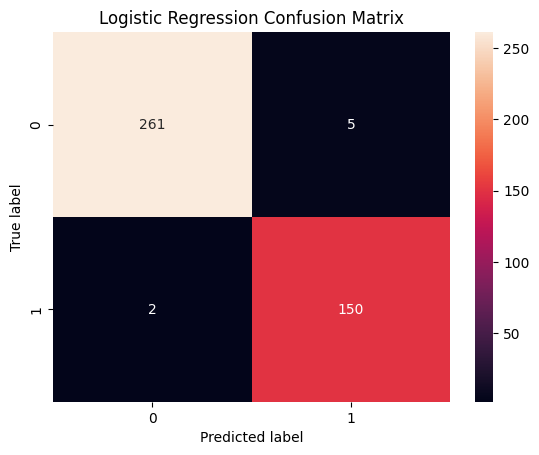

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

logreg_prediction = logreg.predict(test_x)
plt.figure()
sns.heatmap(confusion_matrix(test_y, logreg_prediction), annot=True, fmt=".0f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Confusion Matrix")

In [50]:
print(classification_report(test_y, logreg_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.97      0.99      0.98       152

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



The model has high precision, indicating that when it predicts the positive class, it is likely to be correct.
The recall is also high, suggesting that the model is good at capturing positive instances.
The F1-score is high, indicating a good balance between precision and recall.
The overall accuracy is 98%, which is quite good.
This classification report suggests that your model is performing well.

LOGISTIC REGRESSION CURVE

In [51]:
logreg_pred_proba = logreg.predict_proba(test_x)

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])

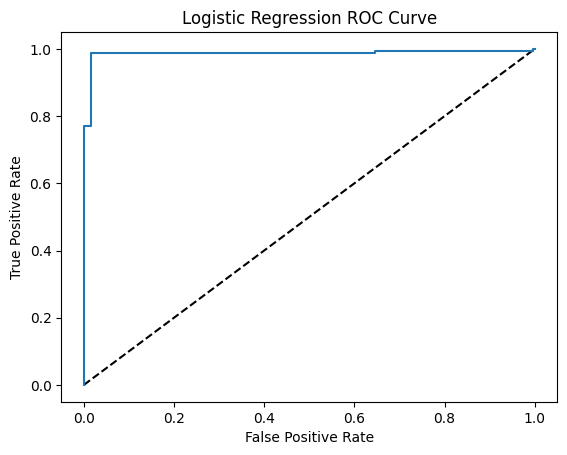

In [53]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

# Conclusion

I have prepared the dataset and made visualization.
I've deduced from every graph that i drew to use for Feature Selection.
I've used 4 ML algorithms. I obtained their accuracies, cross validation scores and f1 scores.
We got %100 accuracy from SVC and also we obtained %98 from Logistic Regression.
I showed the classification reports and confusion matrixes of SVC and Logistic Regression. I also showed the ROC curve of Logistic Regression.